In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("NLP Engineer Assignment Dataset.xlsx", sheet_name="Train")

In [3]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8589 entries, 0 to 8588
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8588 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8589 non-null   object
dtypes: object(3)
memory usage: 201.4+ KB


In [5]:
data.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5298
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [6]:
data[data.emotion_in_tweet_is_directed_at.isnull()][:5]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
16,Holler Gram for iPad on the iTunes App Store -...,NaN,No emotion toward brand or product
32,"Attn: All #SXSW frineds, @mention Register fo...",NaN,No emotion toward brand or product
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product


In [9]:
new_df = data[~data.emotion_in_tweet_is_directed_at.isnull()]

In [10]:
new_df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8573,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
8575,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion
8576,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion
8581,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


### Distribution of emotion_in_tweet_is_directed_at

In [11]:
new_df['emotion_in_tweet_is_directed_at'].value_counts()/len(new_df)

iPad                               0.287451
Apple                              0.200851
iPad or iPhone App                 0.142814
Google                             0.130659
iPhone                             0.090246
Other Google product or service    0.089031
Android App                        0.024613
Android                            0.023701
Other Apple product or service     0.010635
Name: emotion_in_tweet_is_directed_at, dtype: float64

### Distribution of is_there_an_emotion_directed_at_a_brand_or_product

In [12]:
new_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()/len(new_df)

Positive emotion                      0.811911
Negative emotion                      0.157703
No emotion toward brand or product    0.027651
I can't tell                          0.002735
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: float64

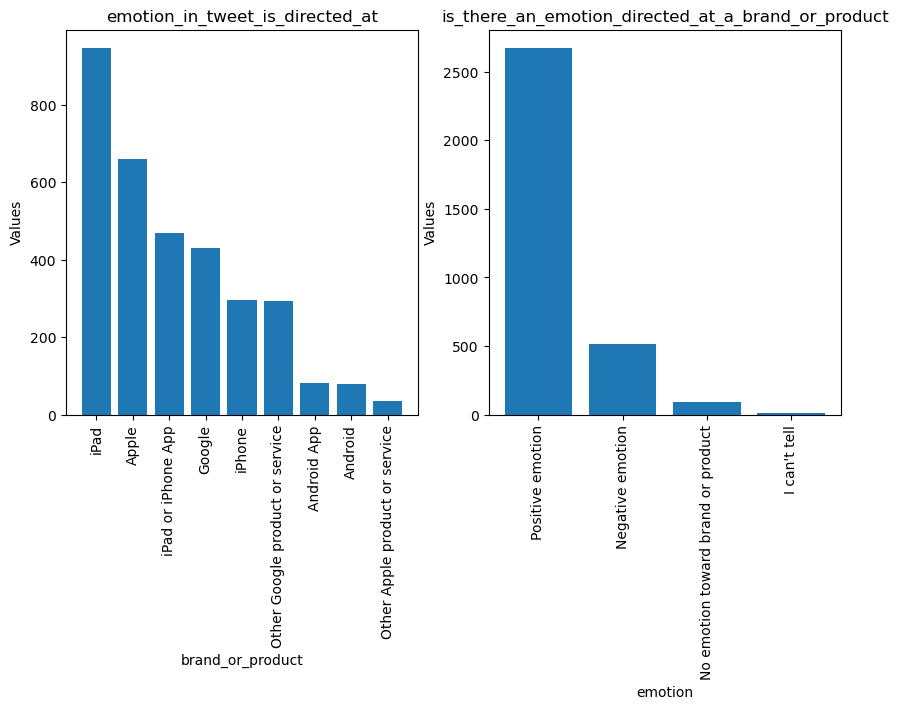

In [13]:
import matplotlib.pyplot as plt

labels1 = new_df['emotion_in_tweet_is_directed_at'].value_counts().index
values1 = new_df['emotion_in_tweet_is_directed_at'].value_counts().values
labels2 = new_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().index
values2 = new_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().values

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(labels1, values1)
axs[0].set_title('emotion_in_tweet_is_directed_at')
axs[0].set_xlabel('brand_or_product')
axs[0].set_ylabel('Values')
axs[0].tick_params(axis='x', rotation=90)

axs[1].bar(labels2, values2)
axs[1].set_title('is_there_an_emotion_directed_at_a_brand_or_product')
axs[1].set_xlabel('emotion')
axs[1].set_ylabel('Values')
axs[1].tick_params(axis='x', rotation=90)

plt.show()

### 48% emotion_in_tweet_is_directed_at iPad and Apple.
### 81% tweet is Positive emotion.

### Text Length Analysis: Analyze the distribution of tweet lengths (number of characters or words).

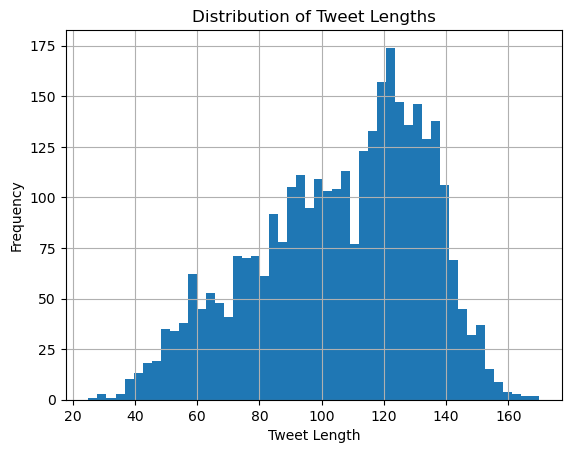

In [14]:
new_df['text_length'] = new_df['tweet_text'].apply(len)
new_df['text_length'].hist(bins=50)
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()

### average tweet length and other statistics.

In [15]:
print(new_df['text_length'].describe())

count    3291.000000
mean      106.049833
std        27.261281
min        25.000000
25%        87.000000
50%       110.000000
75%       127.000000
max       170.000000
Name: text_length, dtype: float64


## Data Cleaning

In [16]:
import re

In [17]:
def remove_text(input_txt, pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [18]:
# 1. Remove @user
new_df['new_tweet_text'] = np.vectorize(remove_text)(new_df['tweet_text'],"@[\w]*")

In [19]:
# 2. Remove Punctuation, Numbers, Special Charaters
new_df['new_tweet_text'] = new_df['new_tweet_text'].str.replace("[^a-zA-Z#]"," ")

In [20]:
new_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text_length,new_tweet_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,I have a G iPhone After hrs tweeting at ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,Know about Awesome iPad iPhone app that yo...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,Can not wait for #iPad also They should sa...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,I hope this year s festival isn t as crashy a...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,great stuff on Fri #SXSW Marissa Mayer Goog...


## Model Building

In [21]:
import tensorflow as tf
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch, os
import pandas as pd
from transformers import pipeline, BertForSequenceClassification, BertTokenizerFast
from torch.utils.data import Dataset

In [22]:
df = new_df[["new_tweet_text", "is_there_an_emotion_directed_at_a_brand_or_product"]]

In [23]:
df.head()

,new_tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,I have a G iPhone After hrs tweeting at ...,Negative emotion
1,Know about Awesome iPad iPhone app that yo...,Positive emotion
2,Can not wait for #iPad also They should sa...,Positive emotion
3,I hope this year s festival isn t as crashy a...,Negative emotion
4,great stuff on Fri #SXSW Marissa Mayer Goog...,Positive emotion


In [24]:
df.reset_index(drop=True, inplace=True)

In [25]:
df.isnull().sum()

new_tweet_text                                        0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [26]:
labels = df['is_there_an_emotion_directed_at_a_brand_or_product'].unique().tolist()
labels = [s.strip() for s in labels ]
labels

['Negative emotion',
 'Positive emotion',
 'No emotion toward brand or product',
 "I can't tell"]

In [27]:
for key, value in enumerate(labels):
    print(value)

Negative emotion
Positive emotion
No emotion toward brand or product
I can't tell


In [28]:
NUM_LABELS= len(labels)

id2label={id:label for id,label in enumerate(labels)}

label2id={label:id for id,label in enumerate(labels)}

In [29]:
label2id

{'Negative emotion': 0,
 'Positive emotion': 1,
 'No emotion toward brand or product': 2,
 "I can't tell": 3}

In [30]:
id2label

{0: 'Negative emotion',
 1: 'Positive emotion',
 2: 'No emotion toward brand or product',
 3: "I can't tell"}

In [31]:
df["labels"]=df['is_there_an_emotion_directed_at_a_brand_or_product'].map(lambda x: label2id[x.strip()])

In [32]:
df.head()

,new_tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,labels
0,I have a G iPhone After hrs tweeting at ...,Negative emotion,0
1,Know about Awesome iPad iPhone app that yo...,Positive emotion,1
2,Can not wait for #iPad also They should sa...,Positive emotion,1
3,I hope this year s festival isn t as crashy a...,Negative emotion,0
4,great stuff on Fri #SXSW Marissa Mayer Goog...,Positive emotion,1


In [33]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [34]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=NUM_LABELS, id2label=id2label, label2id=label2id)

In [34]:
from sklearn.model_selection import train_test_split

train_df, validation_df = train_test_split(
    df,
    test_size=0.2,
    random_state=10
)

In [35]:
train_texts = list(train_df['new_tweet_text'])
val_texts = list(validation_df['new_tweet_text'])
train_labels = list(train_df['labels'])
val_labels = list(validation_df['labels'])

In [36]:
len(train_texts)

2632

In [37]:
len(train_texts), len(val_texts)

(2632, 659)

In [95]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings  = tokenizer(val_texts, truncation=True, padding=True)

In [39]:
class DataLoader(Dataset):
    """
    Custom Dataset class for handling tokenized text data and corresponding labels.
    Inherits from torch.utils.data.Dataset.
    """
    def __init__(self, encodings, labels):
        """
        Initializes the DataLoader class with encodings and labels.

        Args:
            encodings (dict): A dictionary containing tokenized input text data
                              (e.g., 'input_ids', 'token_type_ids', 'attention_mask').
            labels (list): A list of integer labels for the input text data.
        """
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        """
        Returns a dictionary containing tokenized data and the corresponding label for a given index.

        Args:
            idx (int): The index of the data item to retrieve.

        Returns:
            item (dict): A dictionary containing the tokenized data and the corresponding label.
        """
        # Retrieve tokenized data for the given index
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # Add the label for the given index to the item dictionary
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        """
        Returns the number of data items in the dataset.

        Returns:
            (int): The number of data items in the dataset.
        """
        return len(self.labels)

In [40]:
train_dataloader = DataLoader(train_encodings, train_labels)

val_dataloader = DataLoader(val_encodings, val_labels)

In [96]:
train_dataloader[0]

{'input_ids': tensor([  101,  2663,  2019, 25249,  3081,  2678, 12528,  8663,  2156, 17174,
         15934,  2012,  4957,  1001,  1055,  2595, 26760,  1001, 10514,  3022,
          2595, 26760,  1001,  1055,  2595, 26760,  6305, 29109,  1001, 10670,
          1001,  2235,  5638,  2480,  1001,  5766,  3211,  5104,  7507,  2102,
           102,     0,     0,     0,     0,     0]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]),
 'labels': tensor(1)}

In [41]:
from transformers import TrainingArguments, Trainer

In [42]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    # Extract true labels from the input object
    labels = pred.label_ids
    
    # Finding the column index with the maximum probability
    preds = pred.predictions.argmax(-1)
    
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    
    acc = accuracy_score(labels, preds)
    
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [43]:
training_args = TrainingArguments(
    output_dir='./model', 
    do_train=True,
    do_eval=True,
    num_train_epochs=2,              
    warmup_steps=100,                
    weight_decay=0.01,
    logging_strategy='steps',              
    logging_dir='./logs',            
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=100,
    save_strategy="steps", 
    load_best_model_at_end=True
)

In [44]:
trainer = Trainer(
    model=model,                      
    args=training_args,                 
    train_dataset=train_dataloader,         
    eval_dataset=val_dataloader,            
    compute_metrics= compute_metrics
)

In [45]:
trainer.train()

***** Running training *****
  Num examples = 2632
  Num Epochs = 2
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 658


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
100,0.573000,0.624589,0.779970,0.219096,0.194992,0.250000
200,0.514400,0.489569,0.820941,0.381786,0.363954,0.408404
300,0.566400,0.494658,0.845220,0.368812,0.414629,0.354160
400,0.330300,0.532994,0.867982,0.409246,0.403474,0.415320
500,0.277900,0.641666,0.874052,0.406385,0.423300,0.397679
600,0.276200,0.547693,0.872534,0.411773,0.405423,0.418412


***** Running Evaluation *****
  Num examples = 659
  Batch size = 8
***** Running Evaluation *****
  Num examples = 659
  Batch size = 8
***** Running Evaluation *****
  Num examples = 659
  Batch size = 8
***** Running Evaluation *****
  Num examples = 659
  Batch size = 8
***** Running Evaluation *****
  Num examples = 659
  Batch size = 8
Saving model checkpoint to ./model\checkpoint-500
Configuration saved in ./model\checkpoint-500\config.json
Model weights saved in ./model\checkpoint-500\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 659
  Batch size = 8


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./model\checkpoint-500 (score: 0.6416656970977783).


TrainOutput(global_step=658, training_loss=0.43904840040351845, metrics={'train_runtime': 3291.6979, 'train_samples_per_second': 1.599, 'train_steps_per_second': 0.2, 'total_flos': 124437319249152.0, 'train_loss': 0.43904840040351845, 'epoch': 2.0})

## Prediction

In [106]:
def predict(text):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
    outputs = model(**inputs)

    probs = outputs[0].softmax(1)
    pred_label_idx = probs.argmax()
    
    pred_label = model.config.id2label[pred_label_idx.item()]

    return probs, pred_label_idx, pred_label

In [107]:
test_data = pd.read_excel("NLP Engineer Assignment Dataset.xlsx", sheet_name="Test")

In [104]:
test_data['Tweet'][1]

'Again? RT @mention Line at the Apple store is insane.. #sxsw'

In [108]:
predict = predict(test_data['Tweet'][1])

In [109]:
predict

(tensor([[7.9422e-03, 9.8529e-01, 5.9641e-03, 8.0124e-04]],
        grad_fn=<SoftmaxBackward0>),
 tensor(1),
 'Positive emotion')

## Save the model

In [110]:
model.save_pretrained('./nlp_model')
tokenizer.save_pretrained('./nlp_model')

Configuration saved in ./nlp_model\config.json
Model weights saved in ./nlp_model\pytorch_model.bin
tokenizer config file saved in ./nlp_model\tokenizer_config.json
Special tokens file saved in ./nlp_model\special_tokens_map.json


('./nlp_model\\tokenizer_config.json',
 './nlp_model\\special_tokens_map.json',
 './nlp_model\\vocab.txt',
 './nlp_model\\added_tokens.json',
 './nlp_model\\tokenizer.json')